In [36]:
import pandas as pd
import numpy as np
# Load Data Viz Packages
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
df= pd.read_csv(r'C:\Users\james\assigment1\covid_19_data.csv')


df.head()

,SNo,Date,Province/State,Country/Region,Last Update,Confirmed,Deaths,Recovered
0,1,1/22/2020,Anhui,Mainland China,1/22/2020 17:00,1,0,0
1,2,1/22/2020,Beijing,Mainland China,1/22/2020 17:00,14,0,0
2,3,1/22/2020,Chongqing,Mainland China,1/22/2020 17:00,6,0,0
3,4,1/22/2020,Fujian,Mainland China,1/22/2020 17:00,1,0,0
4,5,1/22/2020,Gansu,Mainland China,1/22/2020 17:00,0,0,0


In [2]:
df.columns
df.columns.str.replace(r'\\n','', regex=True)
df.columns = df.columns.str.replace(r'\\n','', regex=True)
df.columns
df.rename(columns={'Province/State':'Province/State','Country/Region':'Country/Region','Confirmed':'Confirmed','Deaths':'Deaths','Recovered':'Recovered'},inplace=True)

In [15]:
from sklearn.preprocessing import StandardScaler
variables = ['Confirmed', 'Deaths', 'Recovered',]
x = df.loc[:, variables].values
y = df.loc[:,['Country/Region']].values
x = StandardScaler().fit_transform(x)
x = pd.DataFrame(x)

In [16]:
from sklearn.decomposition import PCA
pca = PCA()
x_pca = pca.fit_transform(x)
x_pca = pd.DataFrame(x_pca)
x_pca.head()

,0,1,2
0,-0.274937,-0.000541,-0.044267
1,-0.274422,-0.000761,-0.043644
2,-0.274739,-0.000626,-0.044028
3,-0.274937,-0.000541,-0.044267
4,-0.274977,-0.000524,-0.044315


In [17]:
from sklearn.decomposition import PCA
pca = PCA()
x_pca = pca.fit_transform(x)
x_pca = pd.DataFrame(x_pca)
x_pca.head(95)

,0,1,2
0,-0.274937,-0.000541,-0.044267
1,-0.274422,-0.000761,-0.043644
2,-0.274739,-0.000626,-0.044028
3,-0.274937,-0.000541,-0.044267
4,-0.274977,-0.000524,-0.044315
...,...,...,...
90,-0.274065,-0.000913,-0.043213
91,-0.274095,-0.000717,-0.043379
92,-0.274263,-0.000829,-0.043453
93,-0.274382,-0.000778,-0.043596


In [18]:
x_pca['Country/Region']=y
x_pca.columns = ['PC1','PC2','PC3','Country/Region']
x_pca.head()

,PC1,PC2,PC3,Country/Region
0,-0.274937,-0.000541,-0.044267,Mainland China
1,-0.274422,-0.000761,-0.043644,Mainland China
2,-0.274739,-0.000626,-0.044028,Mainland China
3,-0.274937,-0.000541,-0.044267,Mainland China
4,-0.274977,-0.000524,-0.044315,Mainland China


In [19]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
principalComponents = pca.fit_transform(x)
principalDf = pd.DataFrame(data = principalComponents
             , columns = ['principal component 1', 'principal component 2'])

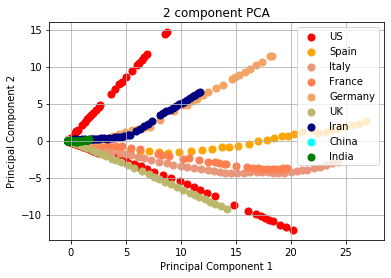

In [35]:
import matplotlib.pyplot as plt
fig = plt.figure()
ax = fig.add_subplot(1,1,1) 
ax.set_xlabel('Principal Component 1') 
ax.set_ylabel('Principal Component 2')
ax.set_title('2 component PCA') 
targets = ['US', 'Spain', 'Italy','France','Germany','UK','Iran','China','India']
colors = ['red', 'orange', 'darksalmon','coral','sandybrown','darkkhaki','navy','cyan','green']
for target, color in zip(targets,colors):
    indicesToKeep = x_pca['Country/Region'] == target
    ax.scatter(x_pca.loc[indicesToKeep, 'PC1']
 , x_pca.loc[indicesToKeep, 'PC2']
 , c = color
 , s = 50)
ax.legend(targets)
ax.grid()